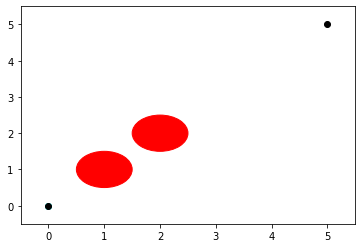

randvex (2.4657985019883375, 6.14821460052165)
Prandvex (3.2557985019883207, 5.358214600521666)


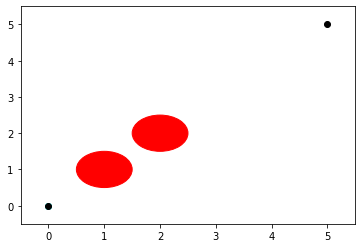

randvex (5.515514543419423, 6.862624513871552)
Prandvex (5.005514543419434, 6.072624513871569)


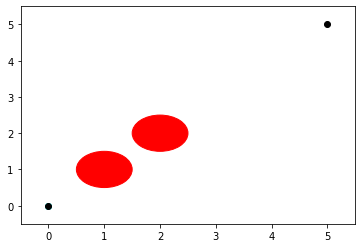

randvex (-0.5203158361173432, 6.9522408094229835)
Prandvex (0.2696841638826572, 6.162240809423)
Nearvex (0.0, 0.0)


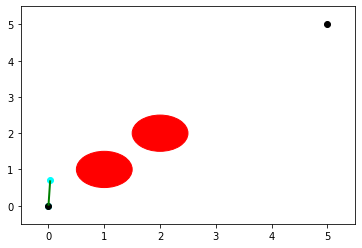

randvex (-1.5474644641777269, 2.8061186533053366)
Prandvex (-0.7574644641777262, 3.5961186533053198)
Nearvex (0.03060548866070697, 0.6993306114162595)


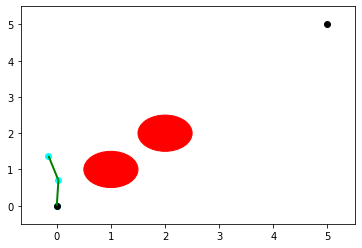

randvex (0.19443318546480093, 5.535994179567975)
Prandvex (0.9844331854648016, 5.0059941795679865)
Nearvex (-0.15315059717985585, 1.3747813504909576)


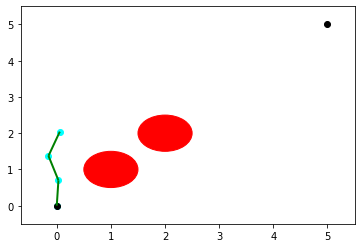

randvex (1.6887828461257373, -1.4193272269176682)
Prandvex (2.4787828461257275, -0.6293272269176675)
Nearvex (0.0, 0.0)


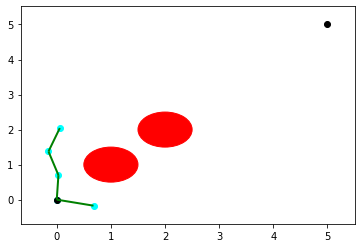

randvex (-1.2050389614900636, 5.350325746706996)
Prandvex (-0.4150389614900629, 5.000325746707003)
Nearvex (0.056116089626887605, 2.0427689654906134)


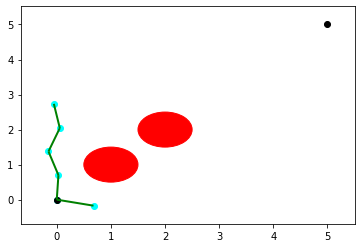

randvex (7.421232373679736, 0.5579172770518435)
Prandvex (6.631232373679753, 1.3479172770518442)
Nearvex (0.6784749184754724, -0.1722549999265657)


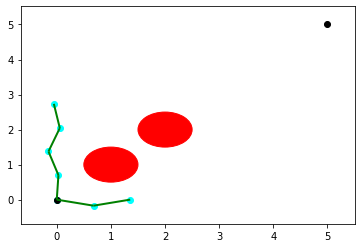

randvex (3.8114869527705206, -0.7146159817221687)
Prandvex (4.601486952770504, 0.07538401827783182)
Nearvex (1.3567085947724262, 0.0009474259707609178)


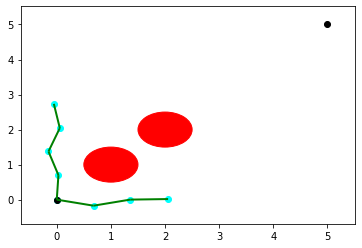

randvex (-0.7827578144982028, 0.7804585389198926)
Prandvex (0.007242185501797742, 1.5704585389198933)
Nearvex (-0.15315059717985585, 1.3747813504909576)


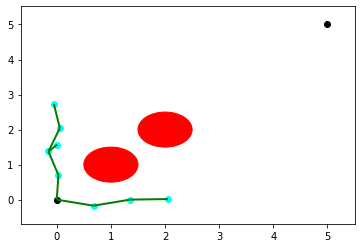

randvex (0.3291026658097529, -2.4326261736543575)
Prandvex (1.1191026658097536, -1.6426261736543664)
Nearvex (0.6784749184754724, -0.1722549999265657)


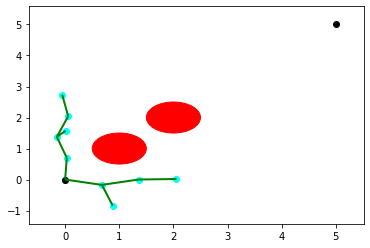

randvex (0.0035656017140892615, 6.898727023887751)
Prandvex (0.7935656017140897, 6.108727023887768)
Nearvex (-0.054009120858375906, 2.734052147707262)


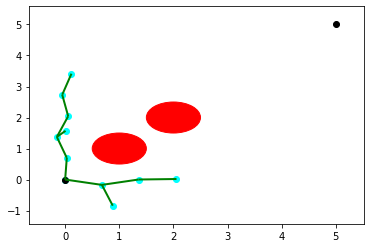

randvex (6.7280152879052935, 7.1532663216656704)
Prandvex (5.93801528790531, 6.363266321665687)
Nearvex (0.1165052987939749, 3.412966599380389)


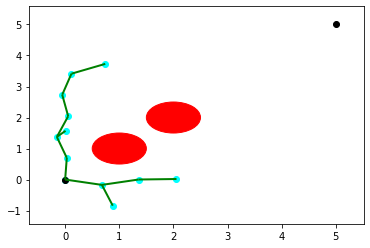

randvex (4.858972859860902, 7.488813869397568)
Prandvex (5.008972859860899, 6.6988138693975845)
Nearvex (0.7408985703816087, 3.7294046539757417)


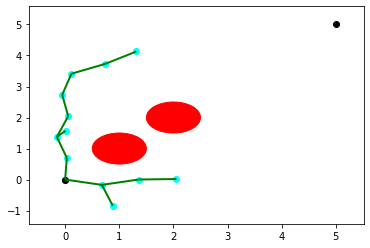

randvex (6.521403098795055, 2.282551900331934)
Prandvex (5.731403098795072, 3.0725519003319173)
Nearvex (1.3155123896558516, 4.129178288297801)


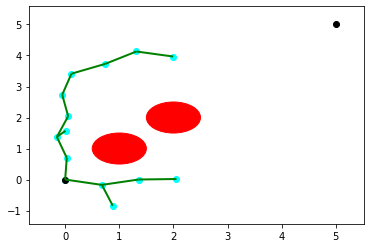

randvex (5.136300704321308, 6.371105449517515)
Prandvex (5.006300704321311, 5.581105449517532)
Nearvex (1.9962948525105717, 3.9662818848093826)


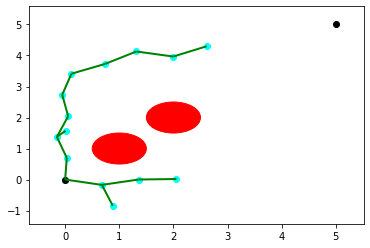

randvex (6.233766249192952, 1.8686583455253558)
Prandvex (5.443766249192969, 2.658658345525342)
Nearvex (2.6131327823981167, 4.29720629952073)


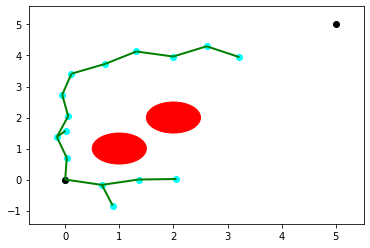

randvex (6.161757074781878, 5.513930659078097)
Prandvex (5.371757074781895, 5.003930659078108)
Nearvex (3.2189534390057135, 3.946519356468183)


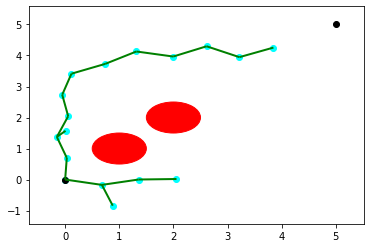

randvex (0.05389723886495634, 7.149592951302658)
Prandvex (0.8438972388649569, 6.359592951302675)
Nearvex (1.3155123896558516, 4.129178288297801)


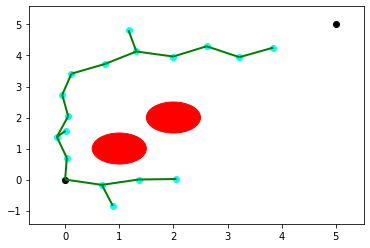

randvex (2.62410266389253, 0.3050185585587837)
Prandvex (3.414102663892513, 1.0950185585587844)
Nearvex (2.056524475367125, 0.01700149920674626)


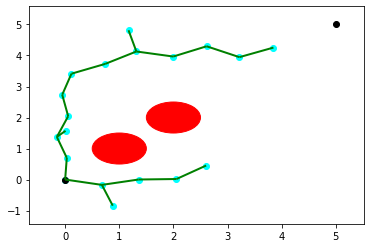

randvex (5.213635052122612, 7.439863076667086)
Prandvex (5.0036350521226165, 6.649863076667103)
Nearvex (3.8472537411213485, 4.2551270854080165)
success
[(0.0, 0.0), (0.03060548866070697, 0.6993306114162595), (-0.15315059717985585, 1.3747813504909576), (0.056116089626887605, 2.0427689654906134), (-0.054009120858375906, 2.734052147707262), (0.1165052987939749, 3.412966599380389), (0.7408985703816087, 3.7294046539757417), (1.3155123896558516, 4.129178288297801), (1.9962948525105717, 3.9662818848093826), (2.6131327823981167, 4.29720629952073), (3.2189534390057135, 3.946519356468183), (3.8472537411213485, 4.2551270854080165), (4.151642526332854, 4.88548211825654), (5.0, 5.0)]


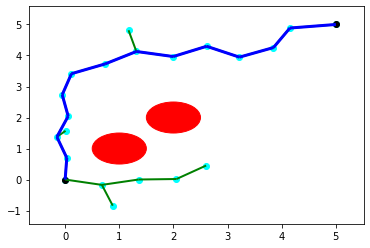

In [1]:
'''
MIT License
Copyright (c) 2019 Fanjin Zeng, 2022 dongkam
This work is licensed under the terms of the MIT license, see <https://opensource.org/licenses/MIT>.
'''

import numpy as np
from random import random
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
from collections import deque

class Line():
    ''' Define line '''
    def __init__(self, p0, p1):
        self.p = np.array(p0)
        self.dirn = np.array(p1) - np.array(p0)
        self.dist = np.linalg.norm(self.dirn)
        self.dirn /= self.dist # normalize

    def path(self, t):
        return self.p + t * self.dirn


def Intersection(line, center, radius):
    ''' Check line-sphere (circle) intersection '''
    a = np.dot(line.dirn, line.dirn)
    b = 2 * np.dot(line.dirn, line.p - center)
    c = np.dot(line.p - center, line.p - center) - radius * radius

    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return False

    t1 = (-b + np.sqrt(discriminant)) / (2 * a)
    t2 = (-b - np.sqrt(discriminant)) / (2 * a)

    if (t1 < 0 and t2 < 0) or (t1 > line.dist and t2 > line.dist):
        return False

    return True



def distance(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))


def isInObstacle(vex, obstacles, radius):
    for obs in obstacles:
        if distance(obs, vex) < radius:
            return True
    return False


def isThruObstacle(line, obstacles, radius):
    for obs in obstacles:
        if Intersection(line, obs, radius):
            return True
    return False


def nearest(G, vex, obstacles, radius):
    Nvex = None
    Nidx = None
    minDist = float("inf")

    for idx, v in enumerate(G.vertices):
        line = Line(v, vex)
        if isThruObstacle(line, obstacles, radius):
            continue
        dist = distance(v, vex)
        if dist < minDist:
            minDist = dist
            Nidx = idx
            Nvex = v

    return Nvex, Nidx

def newVertex(randvex, nearvex, stepSize):
    dirn = np.array(randvex) - np.array(nearvex)
    length = np.linalg.norm(dirn)
    dirn = (dirn / length) * min (stepSize, length)

    newvex = (nearvex[0]+dirn[0], nearvex[1]+dirn[1])
    return newvex


def window(startpos, endpos):
    ''' Define seach window - 2 times of start to end rectangle'''
    width = endpos[0] - startpos[0]
    height = endpos[1] - startpos[1]
    winx = startpos[0] - (width / 2.)
    winy = startpos[1] - (height / 2.)
    return winx, winy, width, height


def isInWindow(pos, winx, winy, width, height):
    ''' Restrict new vertex insides search window'''
    if winx < pos[0] < winx+width and \
        winy < pos[1] < winy+height:
        return True
    else:
        return False


class Graph:
    ''' Define graph '''
    def __init__(self, startpos, endpos):
        self.startpos = startpos
        self.endpos = endpos

        self.vertices = [startpos]
        self.edges = []
        self.success = False

        self.vex2idx = {startpos:0}
        self.neighbors = {0:[]}
        self.distances = {0:0.}

        self.sx = endpos[0] - startpos[0]
        self.sy = endpos[1] - startpos[1]

    def add_vex(self, pos):
        try:
            idx = self.vex2idx[pos]
        except:
            idx = len(self.vertices)
            self.vertices.append(pos)
            self.vex2idx[pos] = idx
            self.neighbors[idx] = []
        return idx

    def add_edge(self, idx1, idx2, cost):
        self.edges.append((idx1, idx2))
        self.neighbors[idx1].append((idx2, cost))
        self.neighbors[idx2].append((idx1, cost))


    def randomPosition(self):
        rx = random()
        ry = random()

        posx = self.startpos[0] - (self.sx / 2.) + rx * self.sx * 2
        posy = self.startpos[1] - (self.sy / 2.) + ry * self.sy * 2
        return posx, posy


def NEARESTOBSTACLE(obstacles,prandvex):
    minDist = float("inf")
    for obs in obstacles:
        dist=distance(obs,prandvex)
        if dist < minDist:
            minDist = dist
    return minDist

def RGD(vex,dobs,lam):
    prandvex=vex
    for i in range(1,80):
        att=(endpos[0]-prandvex[0],endpos[1]-prandvex[1])
        dmin=NEARESTOBSTACLE(obstacles,prandvex)
        if dmin<=dobs:
            return prandvex
        else:
            prandvex=(prandvex[0]+lam*(att[0]/abs(att[0])),prandvex[1]+lam*(att[1]/abs(att[1])))
    return prandvex
def RRT(startpos, endpos, obstacles, n_iter, radius, stepSize):
    ''' RRT algorithm '''
    G = Graph(startpos, endpos)

    for _ in range(n_iter):
        randvex = G.randomPosition()
        if isInObstacle(randvex, obstacles, radius):
            continue

        nearvex, nearidx = nearest(G, randvex, obstacles, radius)
        if nearvex is None:
            continue

        newvex = newVertex(randvex, nearvex, stepSize)

        newidx = G.add_vex(newvex)
        dist = distance(newvex, nearvex)
        G.add_edge(newidx, nearidx, dist)

        dist = distance(newvex, G.endpos)
        if dist < 2 * radius:
            endidx = G.add_vex(G.endpos)
            G.add_edge(newidx, endidx, dist)
            G.success = True
            print('success')
            break
    return G


def P_RRT_star(startpos, endpos, obstacles, n_iter, radius, stepSize):
    ''' RRT star algorithm '''
    G = Graph(startpos, endpos)

    for i in range(n_iter):
        plot(G, obstacles, radius)
        randvex = G.randomPosition()
        if isInObstacle(randvex, obstacles, radius):
            continue
        print('randvex',randvex)
        prandvex=RGD(randvex,0.5,0.01)
        if prandvex is None:
            continue
        print('Prandvex',prandvex)
        nearvex, nearidx = nearest(G, prandvex, obstacles, radius)
        if nearvex is None:
            continue
        print('Nearvex',nearvex)
        newvex = newVertex(prandvex, nearvex, stepSize)
        newidx = G.add_vex(newvex)
        dist = distance(newvex, nearvex)
        G.add_edge(newidx, nearidx, dist)
        G.distances[newidx] = G.distances[nearidx] + dist

        # update nearby vertices distance (if shorter)
        for vex in G.vertices:
            if vex == newvex:
                continue

            dist = distance(vex, newvex)
            if dist > radius:
                continue

            line = Line(vex, newvex)
            if isThruObstacle(line, obstacles, radius):
                continue

            idx = G.vex2idx[vex]
            if G.distances[newidx] + dist < G.distances[idx]:
                G.add_edge(idx, newidx, dist)
                G.distances[idx] = G.distances[newidx] + dist

        dist = distance(newvex, G.endpos)
        if dist < 2 * radius:
            endidx = G.add_vex(G.endpos)
            G.add_edge(newidx, endidx, dist)
            try:
                G.distances[endidx] = min(G.distances[endidx], G.distances[newidx]+dist)
            except:
                G.distances[endidx] = G.distances[newidx]+dist

            G.success = True
            print('success')
            break
    return G



def dijkstra(G):
    '''
    Dijkstra algorithm for finding shortest path from start position to end.
    '''
    srcIdx = G.vex2idx[G.startpos]
    dstIdx = G.vex2idx[G.endpos]

    # build dijkstra
    nodes = list(G.neighbors.keys())
    dist = {node: float('inf') for node in nodes}
    prev = {node: None for node in nodes}
    dist[srcIdx] = 0

    while nodes:
        curNode = min(nodes, key=lambda node: dist[node])
        nodes.remove(curNode)
        if dist[curNode] == float('inf'):
            break

        for neighbor, cost in G.neighbors[curNode]:
            newCost = dist[curNode] + cost
            if newCost < dist[neighbor]:
                dist[neighbor] = newCost
                prev[neighbor] = curNode

    # retrieve path
    path = deque()
    curNode = dstIdx
    while prev[curNode] is not None:
        path.appendleft(G.vertices[curNode])
        curNode = prev[curNode]
    path.appendleft(G.vertices[curNode])
    return list(path)



def plot(G, obstacles, radius, path=None):
    '''
    Plot RRT, obstacles and shortest path
    '''
    px = [x for x, y in G.vertices]
    py = [y for x, y in G.vertices]
    fig, ax = plt.subplots()

    for obs in obstacles:
        circle = plt.Circle(obs, radius, color='red')
        ax.add_artist(circle)

    ax.scatter(px, py, c='cyan')
    ax.scatter(G.startpos[0], G.startpos[1], c='black')
    ax.scatter(G.endpos[0], G.endpos[1], c='black')

    lines = [(G.vertices[edge[0]], G.vertices[edge[1]]) for edge in G.edges]
    lc = mc.LineCollection(lines, colors='green', linewidths=2)
    ax.add_collection(lc)

    if path is not None:
        paths = [(path[i], path[i+1]) for i in range(len(path)-1)]
        lc2 = mc.LineCollection(paths, colors='blue', linewidths=3)
        ax.add_collection(lc2)

    ax.autoscale()
    ax.margins(0.1)
    plt.show()


def pathSearch(startpos, endpos, obstacles, n_iter, radius, stepSize):
    G = P_RRT_star(startpos, endpos, obstacles, n_iter, radius, stepSize)
    if G.success:
        path = dijkstra(G)
        # plot(G, obstacles, radius, path)
        return path


if __name__ == '__main__':
    startpos = (0., 0.)
    endpos = (5., 5.)
    obstacles = [(1., 1.), (2., 2.)]
    n_iter = 200
    radius = 0.5
    stepSize = 0.7

    G = P_RRT_star(startpos, endpos, obstacles, n_iter, radius, stepSize)
    # G = RRT(startpos, endpos, obstacles, n_iter, radius, stepSize)

    if G.success:
        path = dijkstra(G)
        print(path)
        plot(G, obstacles, radius, path)
    else:
        plot(G, obstacles, radius)